# 🚗📊 Vehicle Insurance Prediction System 📈💼


#                                :📝  Background

# This project aims to help insurance companies predict whether a customer will be interested in purchasing vehicle insurance. By analyzing customer and vehicle data (like age, gender, vehicle damage, and region), the model helps improve marketing efforts by targeting the right audience. 
# The goal is to increase policy sales, reduce marketing costs, and support smarter decision-making using machine learning techniques.

In [213]:
# # Importing essential libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from IPython.display import Image, display


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report




In [152]:
# # Loading the dataset
df= pd.read_csv(r"C:\Users\Payal Gupta\OneDrive\ドキュメント\Capstone project\data.csv")

# Data Exploration & Visualization¶


In [153]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [154]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [155]:
df.shape # # Dataset shape: 381,109 rows and 12 columns

(381109, 12)

In [156]:
df.info() # # No missing values in the dataset (381,109 rows, 12 columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [157]:
df.duplicated().sum() # # No duplicate values found in the dataset (381,109 rows, 12 columns).

0

In [158]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## Data Visualization


In [159]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


<Axes: xlabel='Gender'>

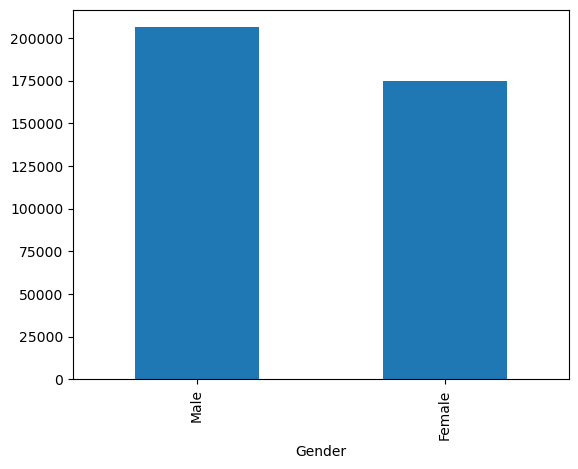

In [160]:
df.Gender.value_counts().plot(kind='bar') 

# # The dataset includes more than 2lac males and over 1.75lac females.

Driving_License
1    380297
0       812
Name: count, dtype: int64

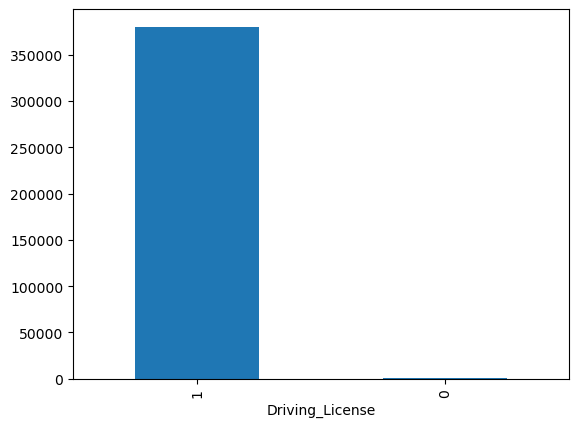

In [161]:
df['Driving_License'].value_counts().plot(kind='bar')
df['Driving_License'].value_counts()

# # 3.8 lacs customers with driving licence & only 812 without it

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

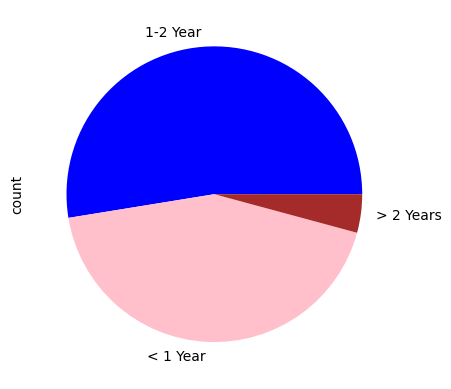

In [162]:
df.Vehicle_Age.value_counts().plot(kind='pie',colors=['blue','pink','brown'])
df.Vehicle_Age.value_counts()

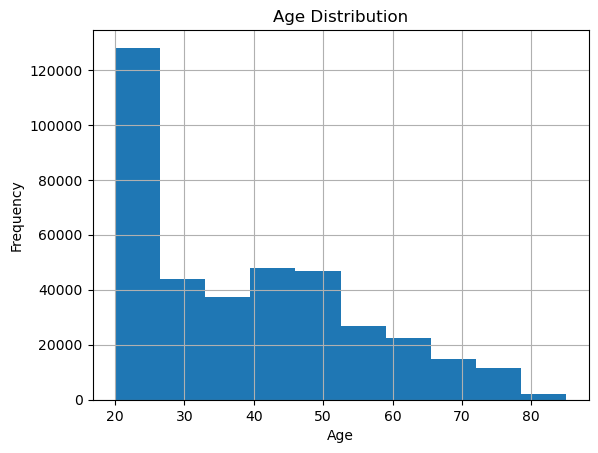

In [163]:
df['Age'].hist(bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
 # # The majority of people in the dataset are between 20 and 30 years old

# # Data Preprocessing


In [164]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [165]:
df.drop('id',inplace =True,axis =1)

In [166]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [171]:
df.replace({'Gender': {'Male': 1, 'Female': 2}}, inplace=True)

In [173]:
df.replace({'Vehicle_Damage': {'Yes': 1, 'No': 0}}, inplace=True)
df['Vehicle_Damage'] = df['Vehicle_Damage'].astype(int)


In [174]:
df.replace({'Vehicle_Age' : {'< 1 Year' :1,'> 2 Years' :2,'1-2 Year' :3}},inplace=True)

In [175]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,1,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,1,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,3,0,28619.0,152.0,203,0
4,2,29,1,41.0,1,3,0,27496.0,152.0,39,0


### Splitting the data into Training & Testing Data



In [184]:
# #Define the features (X) and the output labels (y)

y=df['Response']
X=df.drop('Response',axis=1)


In [185]:
# Split the data into training and testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(304887, 10)
(76222, 10)
(304887,)
(76222,)


In [186]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Model Training & Machine Learnings

### Logistic Regression Model

In [203]:

# # Initialize and train Logistic Regression model with class_weight='balanced
model = LogisticRegression(max_iter=1000, random_state=42,class_weight='balanced')

# # Train the model
model.fit(X_train, y_train)

# # Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


# # Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.6390674608380782
Precision: 0.25175573356743114
Recall: 0.9749282906618506
F1-Score: 0.40017442494276684
ROC-AUC: 0.831419897537137

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.59      0.74     66809
           1       0.25      0.97      0.40      9413

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



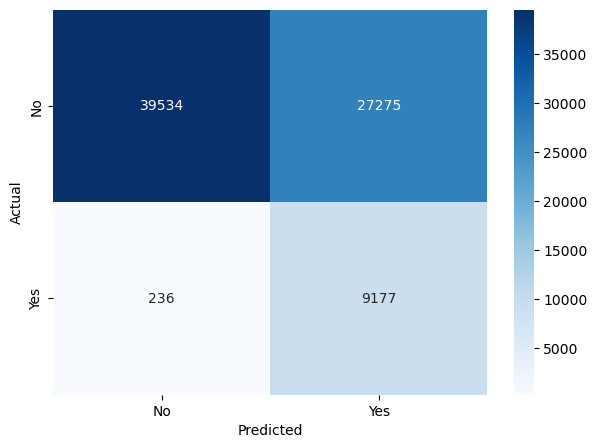

In [208]:
# Generate confusion matrix

cm = confusion_matrix(y_test, y_pred)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [229]:
### Confusion Matrix
# Matrix is very good at catching actual "Yes" customers (9,177) 
# But it predicts a lot of "Yes" incorrectly
# This Matrix favors catching as many positives as possible

# Decision Tree Classifier

In [211]:

# # train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# # Make predictions
y_pred = dt_model.predict(X_test)

# # Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.824368292618929
Precision: 0.29616331555190806
Recall: 0.30670349516625944
F1-Score: 0.3013412661134596
ROC-AUC: 0.831419897537137

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     66809
           1       0.30      0.31      0.30      9413

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.82      0.83     76222



# Random Forest Classifier

In [212]:
# # train the model

rf_model = RandomForestClassifier(random_state=60)
rf_model.fit(X_train, y_train)

# # Make predictions
y_pred = rf_model.predict(X_test)

# # Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8661803678727926
Precision: 0.3734319716950788
Recall: 0.12334006161691279
F1-Score: 0.18543363679923336
ROC-AUC: 0.831419897537137

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93     66809
           1       0.37      0.12      0.19      9413

    accuracy                           0.87     76222
   macro avg       0.63      0.55      0.56     76222
weighted avg       0.82      0.87      0.84     76222



## 📊 COMPARISON TABLE (ALL 3 MODELS)



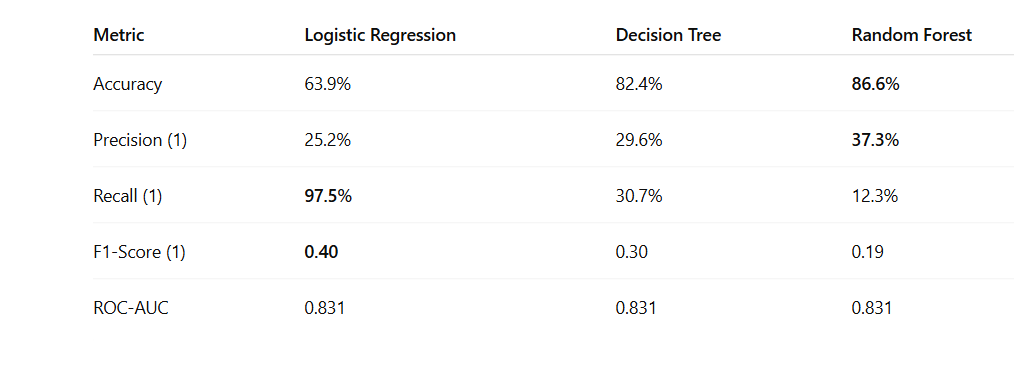

In [216]:
display(Image(filename=r'C:\Users\Payal Gupta\OneDrive\画像\Screenshots\Screenshot 2025-05-01 233929.png'))


### Logistic Regression 
### Best at finding interested users (97% recall)

### Good for marketing reach, but low precision means more false leads

### Lower overall accuracy (63.9%)

### Decision Tree 
### Balanced model, moderate precision & recall

### Accuracy is good (82%), useful for general targeting

### Random Forest 
### Highest accuracy (86.6%), but misses most interested users

### Best for high-confidence predictions, but not ideal for outreach



###  Logistic Regression if  top priority is maximizing policy sales by ensuring you reach nearly every interested customer.
###  Random Forest if  want to focus efforts only on likely buyers to optimize marketing costs.



###  Logistic Regression if  top priority is maximizing policy sales by ensuring you reach nearly every interested customer.
###  Random Forest if want to focus efforts only on likely buyers to optimize marketing costs.

